In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_excel('Data for disagg.xlsx')

In [2]:
df.head()

,Date,Channel,Loc,warehouse,Store,Category,SubCat,Brand,SKU,Sales
0,2019-01-01,VM,Hanoi,RDC-1,Vin Mart1,Drinks,Carbonated,Coke,Coke Can 300 ML,45
1,2019-01-01,VM,Hanoi,RDC-1,Vin Mart1,Drinks,Carbonated,Coke,Coke Bottle 300 ML,102
2,2019-01-01,VM,Hanoi,RDC-1,Vin Mart1,Drinks,Non Carbonated,Evian,Evial 1 litre,96
3,2019-01-01,VM,Hanoi,RDC-1,Vin Mart1,Drinks,Non Carbonated,Evian,Evian 500 ML,160
4,2019-01-01,VM,Hanoi,RDC-1,Vin Mart1,Food,Spring Rolls,Masaan,Spring Roll -5Pcs,122


In [3]:
df_grp = df.groupby(['Channel', 'warehouse','SKU'])
df_grp.size().reset_index(name='count')

,Channel,warehouse,SKU,count
0,Online,CDC,AXE,64
1,Online,CDC,Celling Light 33W,64
2,Online,CDC,Celling Light 60W,64
3,Online,CDC,Closeup Winter Blast,64
4,Online,CDC,Coke Bottle 300 ML,64
5,Online,CDC,Coke Can 300 ML,64
6,Online,CDC,Colgate Total,64
7,Online,CDC,Dove,64
8,Online,CDC,Evial 1 litre,64
9,Online,CDC,Evian 500 ML,64


In [21]:
dp=df_grp.get_group(('Online', 'CDC','AXE'))

In [22]:
dp.head()

,Date,Channel,Loc,warehouse,Store,Category,SubCat,Brand,SKU,Sales
297,2019-01-01,Online,Hanoi,CDC,Online,Wash,Body Wash-Gel,AXE,AXE,132
319,2019-01-01,Online,Hanoi,CDC,Online,Wash,Body Wash-Gel,AXE,AXE,69
627,2019-01-02,Online,Hanoi,CDC,Online,Wash,Body Wash-Gel,AXE,AXE,138
649,2019-01-02,Online,Hanoi,CDC,Online,Wash,Body Wash-Gel,AXE,AXE,205
957,2019-01-03,Online,Hanoi,CDC,Online,Wash,Body Wash-Gel,AXE,AXE,104


In [23]:
dp.describe()

,Sales
count,64.000000
mean,127.500000
std,65.353738
min,5.000000
25%,76.750000
50%,131.500000
75%,179.000000
max,230.000000


In [24]:
Q1 = dp.quantile(0.25)
Q3 = dp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sales    102.25
dtype: float64


In [25]:
dp = dp[['Sales']]

In [26]:
print(dp < (Q1 - 1.5 * IQR)) | (dp > (Q3 + 1.5 * IQR))

       Sales
297    False
319    False
627    False
649    False
957    False
979    False
1287   False
1309   False
1617   False
1639   False
1947   False
1969   False
2277   False
2299   False
2607   False
2629   False
2937   False
2959   False
3267   False
3289   False
3597   False
3619   False
3927   False
3949   False
4257   False
4279   False
4587   False
4609   False
4917   False
4939   False
...      ...
5907   False
5929   False
6237   False
6259   False
6567   False
6589   False
6897   False
6919   False
7227   False
7249   False
7557   False
7579   False
7887   False
7909   False
8217   False
8239   False
8547   False
8569   False
8877   False
8899   False
9207   False
9229   False
9537   False
9559   False
9867   False
9889   False
10197  False
10219  False
10527  False
10549  False

[64 rows x 1 columns]


TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [27]:
dp_out = dp[((dp < (Q1 - 1.5 * IQR)) |(dp > (Q3 + 1.5 * IQR))).any(axis=1)]
print(dp_out.shape)

(0, 1)


Text(0.5, 0, 'Sales')

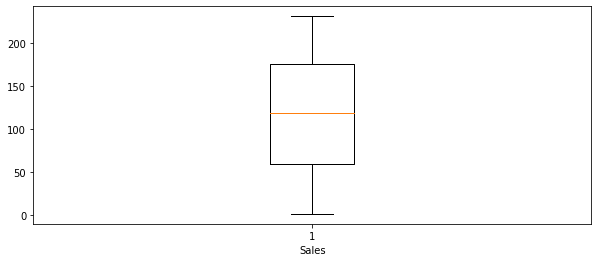

In [28]:
df['Sales'].value_counts(dropna=False).sort_index(ascending = True)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,1,1)

ax1.boxplot(df['Sales'])
ax1.set_xlabel('Sales')